In [2]:
## Importing packages

import numpy as np                 #for general calculations.
import matplotlib.pyplot as plt    #making plots.
import xarray as xr                #loading and working with data in an optimal way.

from matplotlib.animation import FuncAnimation  #creating animations and videos.
from IPython.display import Video, HTML         #embedding videos in the notebook

import cartopy.crs as ccrs         # to plot maps with different projections
import cartopy.feature as cfeature # to plot coastlines, land, borders, etc.

#this command allows interactive plots in noteboks
%matplotlib inline   

# os.environ["CUDA_VISIBLE_DEVICES"]="-1" # uncomment to disable GPU
import tensorflow as tf
from tensorflow import keras

In [3]:
X_train = np.load('../datasets/common/X_train.npy')
Y_train = np.load('../datasets/common/Y_train.npy')
X_valid = np.load('../datasets/common/X_valid.npy')
Y_valid = np.load('../datasets/common/Y_valid.npy')

In [19]:
X_train.shape

(2700, 64, 96, 12)

In [4]:
Y_train.shape

(2700, 12)

In [5]:
np.reshape(X_train,(2700,64,96,12,1)).shape

(2700, 64, 96, 12, 1)

In [4]:
X_train_3d = np.reshape(X_train,(2700,64,96,12,1))

## 2D CNN Models (Activation = relu vs selu, Optimizer = adam, nadam, adamax)

In [4]:
# define a simple 2D CNN model
def create_2d_cnn_model(input_shape, output_shape, activation, optimizer_name):

    x = keras.layers.Input(shape=input_shape)
    
    y = keras.layers.Conv2D(8, (3,3), activation= activation, padding='same')(x) # add a convolutional layer with a ReLU activation
    y = keras.layers.MaxPooling2D(pool_size=(2,2))(y)     # add a max pooling layer

    y = keras.layers.Conv2D(16, (3,3), activation=activation, padding='same')(y)
    y = keras.layers.MaxPooling2D(pool_size=(2,2))(y)

    y = keras.layers.Conv2D(32, (3,3), activation=activation, padding='same')(y)
    y = keras.layers.MaxPooling2D(pool_size=(2,2))(y)

    y = keras.layers.Conv2D(64, (3,3), activation=activation, padding='same')(y)
    y = keras.layers.MaxPooling2D(pool_size=(2,2))(y)

    y = keras.layers.Conv2D(128, (3,3), activation=activation, padding='same')(y)
    
    y = keras.layers.GlobalAveragePooling2D()(y)

    y = keras.layers.Dropout(0.5)(y)
    
    y = keras.layers.Dense(output_shape)(y) 
    
    model = keras.models.Model(inputs=x, outputs=y)
    
    model.compile(optimizer = optimizer_name, loss='mse')
    
    return model

In [14]:
CNN_2d_relu_adam = create_2d_cnn_model(input_shape=(64,96,12), output_shape=12, activation='relu',optimizer_name='adam')
# take a look at how the image tensor changes shape as it passes through the CNN:
CNN_2d_relu_adam.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 96, 12)]      0         
                                                                 
 conv2d (Conv2D)             (None, 64, 96, 8)         872       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 48, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 48, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 24, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 24, 32)        4640

In [8]:
# train the model, and save the progress to hist (hist will be a dictionary)
n_epochs = 20
hist_relu_adam = CNN_2d_relu_adam.fit(x = X_train, y = Y_train, epochs=n_epochs, validation_data=(X_valid,Y_valid))

Epoch 1/20
85/85 [==============================] - 17s 186ms/step - loss: 1.4427 - val_loss: 1.1909
Epoch 2/20
85/85 [==============================] - 15s 174ms/step - loss: 1.1035 - val_loss: 0.9945
Epoch 3/20
85/85 [==============================] - 15s 170ms/step - loss: 0.9267 - val_loss: 0.9446
Epoch 4/20
85/85 [==============================] - 15s 181ms/step - loss: 0.8180 - val_loss: 0.7863
Epoch 5/20
85/85 [==============================] - 15s 172ms/step - loss: 0.7276 - val_loss: 0.7802
Epoch 6/20
85/85 [==============================] - 15s 174ms/step - loss: 0.6511 - val_loss: 0.6894
Epoch 7/20
85/85 [==============================] - 14s 168ms/step - loss: 0.6036 - val_loss: 0.6484
Epoch 8/20
85/85 [==============================] - 14s 169ms/step - loss: 0.5593 - val_loss: 0.6426
Epoch 9/20
85/85 [==============================] - 15s 174ms/step - loss: 0.5038 - val_loss: 0.6140
Epoch 10/20
85/85 [==============================] - 14s 164ms/step - loss: 0.4693 - val_lo

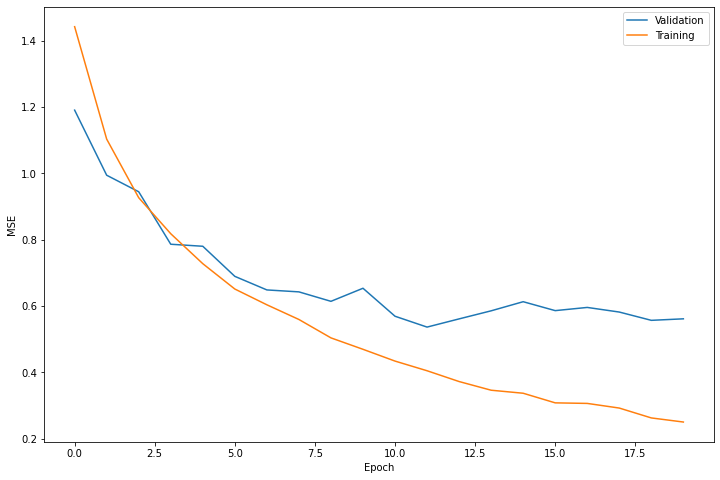

In [9]:
# plot how the mse on the training and validation datasets evolved during training
plt.figure(figsize=(12,8))
plt.plot(hist_relu_adam.history['val_loss'],label='Validation')
plt.plot(hist_relu_adam.history['loss'],label='Training')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE');

Epoch 1/40
85/85 [==============================] - 15s 172ms/step - loss: 1.4407 - val_loss: 1.2586
Epoch 2/40
85/85 [==============================] - 14s 160ms/step - loss: 1.1188 - val_loss: 1.0389
Epoch 3/40
85/85 [==============================] - 14s 160ms/step - loss: 0.9767 - val_loss: 1.0729
Epoch 4/40
85/85 [==============================] - 14s 166ms/step - loss: 0.9060 - val_loss: 0.8562
Epoch 5/40
85/85 [==============================] - 15s 171ms/step - loss: 0.8090 - val_loss: 0.7474
Epoch 6/40
85/85 [==============================] - 14s 162ms/step - loss: 0.7562 - val_loss: 0.7382
Epoch 7/40
85/85 [==============================] - 13s 157ms/step - loss: 0.7006 - val_loss: 0.6751
Epoch 8/40
85/85 [==============================] - 13s 156ms/step - loss: 0.6339 - val_loss: 0.6706
Epoch 9/40
85/85 [==============================] - 13s 156ms/step - loss: 0.5766 - val_loss: 0.6063
Epoch 10/40
85/85 [==============================] - 14s 167ms/step - loss: 0.5439 - val_lo

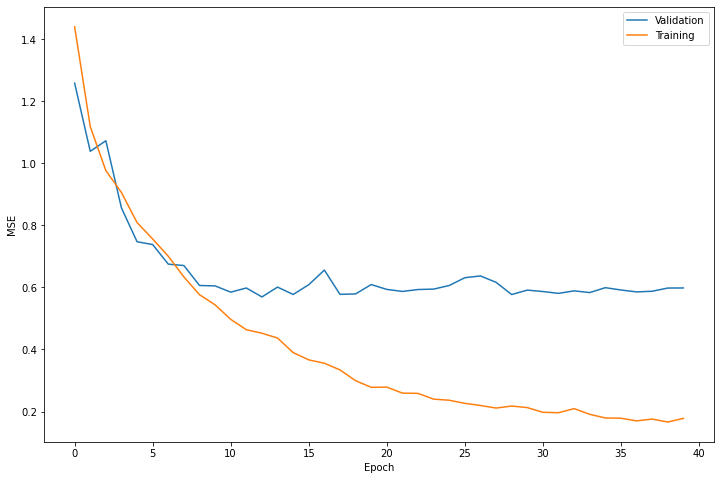

In [15]:
# train the model, and save the progress to hist (hist will be a dictionary)
n_epochs = 40
hist_relu_adam_40 = CNN_2d_relu_adam.fit(x = X_train, y = Y_train, epochs=n_epochs, validation_data=(X_valid,Y_valid))

# plot how the mse on the training and validation datasets evolved during training
plt.figure(figsize=(12,8))
plt.plot(hist_relu_adam_40.history['val_loss'],label='Validation')
plt.plot(hist_relu_adam_40.history['loss'],label='Training')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE');

In [5]:
# relu, nadam
CNN_2d_relu_nadam = create_2d_cnn_model(input_shape=(64,96,12), output_shape=12, activation='relu',optimizer_name='nadam')
# take a look at how the image tensor changes shape as it passes through the CNN:
CNN_2d_relu_nadam.summary()

# train the model, and save the progress to hist (hist will be a dictionary)
n_epochs = 20
hist_relu_nadam = CNN_2d_relu_nadam.fit(x = X_train, y = Y_train, epochs=n_epochs, validation_data=(X_valid,Y_valid))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 96, 12)]      0         
                                                                 
 conv2d (Conv2D)             (None, 64, 96, 8)         872       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 48, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 48, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 24, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 24, 32)        4640  

2022-08-18 18:33:34.721757: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20


2022-08-18 18:33:35.297578: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 796262400 exceeds 10% of free system memory.


85/85 [==============================] - 16s 170ms/step - loss: 1.4889 - val_loss: 1.4095
Epoch 2/20
85/85 [==============================] - 14s 165ms/step - loss: 1.1306 - val_loss: 1.0535
Epoch 3/20
85/85 [==============================] - 14s 163ms/step - loss: 0.9376 - val_loss: 0.8713
Epoch 4/20
85/85 [==============================] - 14s 170ms/step - loss: 0.8258 - val_loss: 0.7837
Epoch 5/20
85/85 [==============================] - 14s 164ms/step - loss: 0.7284 - val_loss: 0.9323
Epoch 6/20
85/85 [==============================] - 14s 162ms/step - loss: 0.6688 - val_loss: 0.6568
Epoch 7/20
85/85 [==============================] - 14s 161ms/step - loss: 0.6215 - val_loss: 0.6822
Epoch 8/20
85/85 [==============================] - 13s 157ms/step - loss: 0.5725 - val_loss: 0.6735
Epoch 9/20
85/85 [==============================] - 13s 158ms/step - loss: 0.5217 - val_loss: 0.8293
Epoch 10/20
85/85 [==============================] - 14s 162ms/step - loss: 0.4771 - val_loss: 0.6161


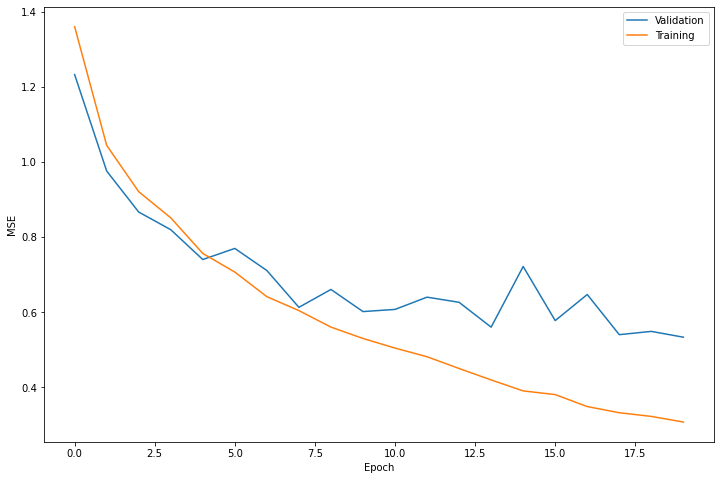

In [11]:
# plot how the mse on the training and validation datasets evolved during training
plt.figure(figsize=(12,8))
plt.plot(hist_relu_nadam.history['val_loss'],label='Validation')
plt.plot(hist_relu_nadam.history['loss'],label='Training')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE');

Epoch 1/40


2022-08-18 18:38:15.357774: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 796262400 exceeds 10% of free system memory.


85/85 [==============================] - 14s 164ms/step - loss: 0.2480 - val_loss: 0.5979
Epoch 2/40
85/85 [==============================] - 14s 163ms/step - loss: 0.2310 - val_loss: 0.6174
Epoch 3/40
85/85 [==============================] - 13s 158ms/step - loss: 0.2266 - val_loss: 0.6175
Epoch 4/40
85/85 [==============================] - 13s 158ms/step - loss: 0.2122 - val_loss: 0.6282
Epoch 5/40
85/85 [==============================] - 14s 164ms/step - loss: 0.2114 - val_loss: 0.5812
Epoch 6/40
85/85 [==============================] - 14s 163ms/step - loss: 0.2058 - val_loss: 0.5988
Epoch 7/40
85/85 [==============================] - 14s 164ms/step - loss: 0.1941 - val_loss: 0.5969
Epoch 8/40
85/85 [==============================] - 14s 164ms/step - loss: 0.1975 - val_loss: 0.5654
Epoch 9/40
85/85 [==============================] - 13s 156ms/step - loss: 0.1861 - val_loss: 0.5767
Epoch 10/40
85/85 [==============================] - 13s 153ms/step - loss: 0.1769 - val_loss: 0.6191


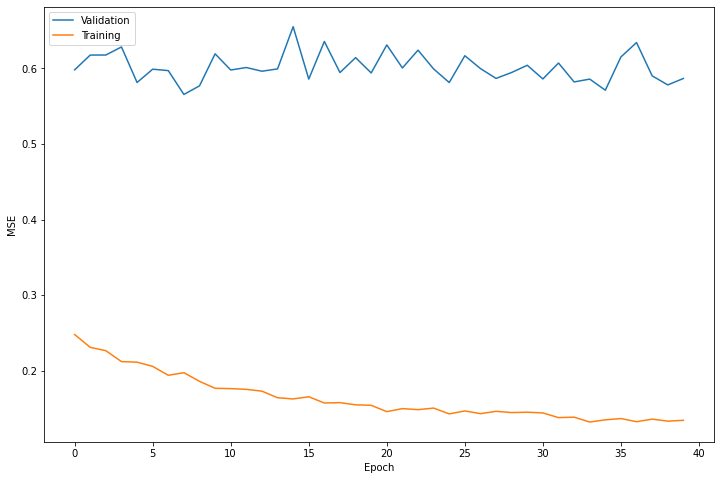

In [6]:
# train the model, and save the progress to hist (hist will be a dictionary)
n_epochs = 40
hist_relu_nadam_40 = CNN_2d_relu_nadam.fit(x = X_train, y = Y_train, epochs=n_epochs, validation_data=(X_valid,Y_valid))

# plot how the mse on the training and validation datasets evolved during training
plt.figure(figsize=(12,8))
plt.plot(hist_relu_nadam_40.history['val_loss'],label='Validation')
plt.plot(hist_relu_nadam_40.history['loss'],label='Training')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE');

In [7]:
# relu, adamax
CNN_2d_relu_adamax = create_2d_cnn_model(input_shape=(64,96,12), output_shape=12, activation='relu',optimizer_name='adamax')
# take a look at how the image tensor changes shape as it passes through the CNN:
CNN_2d_relu_adamax.summary()

# train the model, and save the progress to hist (hist will be a dictionary)
n_epochs = 20
hist_relu_adamax = CNN_2d_relu_adamax.fit(x = X_train, y = Y_train, epochs=n_epochs, validation_data=(X_valid,Y_valid))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 96, 12)]      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 96, 8)         872       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 48, 8)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 48, 16)        1168      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 24, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 24, 32)        4640

2022-08-18 18:47:26.666460: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 796262400 exceeds 10% of free system memory.


85/85 [==============================] - 14s 157ms/step - loss: 1.4976 - val_loss: 1.4728
Epoch 2/20
85/85 [==============================] - 15s 172ms/step - loss: 1.2518 - val_loss: 1.2171
Epoch 3/20
85/85 [==============================] - 13s 154ms/step - loss: 1.1142 - val_loss: 1.1373
Epoch 4/20
85/85 [==============================] - 13s 155ms/step - loss: 1.0480 - val_loss: 1.0853
Epoch 5/20
85/85 [==============================] - 14s 163ms/step - loss: 1.0002 - val_loss: 1.0242
Epoch 6/20
85/85 [==============================] - 14s 163ms/step - loss: 0.9559 - val_loss: 1.0416
Epoch 7/20
85/85 [==============================] - 14s 163ms/step - loss: 0.9307 - val_loss: 0.9571
Epoch 8/20
85/85 [==============================] - 15s 171ms/step - loss: 0.8811 - val_loss: 0.8927
Epoch 9/20
85/85 [==============================] - 14s 162ms/step - loss: 0.8290 - val_loss: 0.8548
Epoch 10/20
85/85 [==============================] - 14s 162ms/step - loss: 0.8067 - val_loss: 0.7939


Text(0, 0.5, 'MSE')

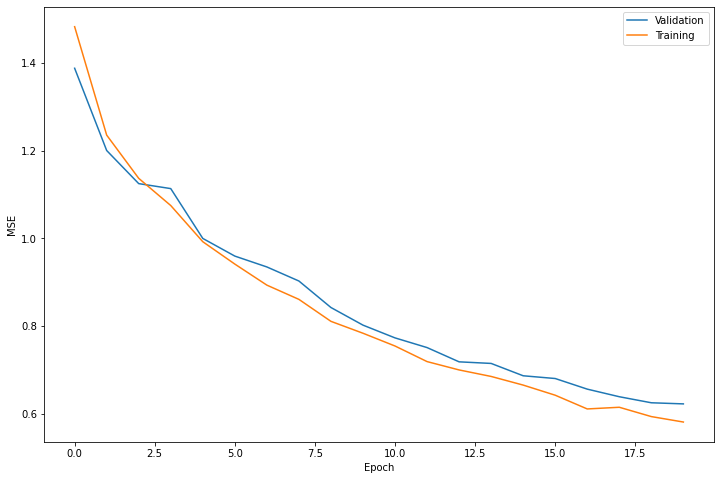

In [14]:
# plot how the mse on the training and validation datasets evolved during training
plt.figure(figsize=(12,8))
plt.plot(hist_relu_adamax.history['val_loss'],label='Validation')
plt.plot(hist_relu_adamax.history['loss'],label='Training')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE')

Epoch 1/40
 1/85 [..............................] - ETA: 9s - loss: 0.4494

2022-08-18 18:52:06.350265: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 796262400 exceeds 10% of free system memory.


85/85 [==============================] - 14s 164ms/step - loss: 0.5742 - val_loss: 0.6399
Epoch 2/40
85/85 [==============================] - 14s 163ms/step - loss: 0.5624 - val_loss: 0.6700
Epoch 3/40
85/85 [==============================] - 14s 162ms/step - loss: 0.5602 - val_loss: 0.6282
Epoch 4/40
85/85 [==============================] - 14s 163ms/step - loss: 0.5395 - val_loss: 0.6148
Epoch 5/40
85/85 [==============================] - 14s 163ms/step - loss: 0.5284 - val_loss: 0.6082
Epoch 6/40
85/85 [==============================] - 14s 164ms/step - loss: 0.5173 - val_loss: 0.6051
Epoch 7/40
85/85 [==============================] - 14s 162ms/step - loss: 0.5053 - val_loss: 0.6175
Epoch 8/40
85/85 [==============================] - 14s 163ms/step - loss: 0.5063 - val_loss: 0.5915
Epoch 9/40
85/85 [==============================] - 14s 165ms/step - loss: 0.4943 - val_loss: 0.5883
Epoch 10/40
85/85 [==============================] - 14s 163ms/step - loss: 0.4804 - val_loss: 0.5953


Text(0, 0.5, 'MSE')

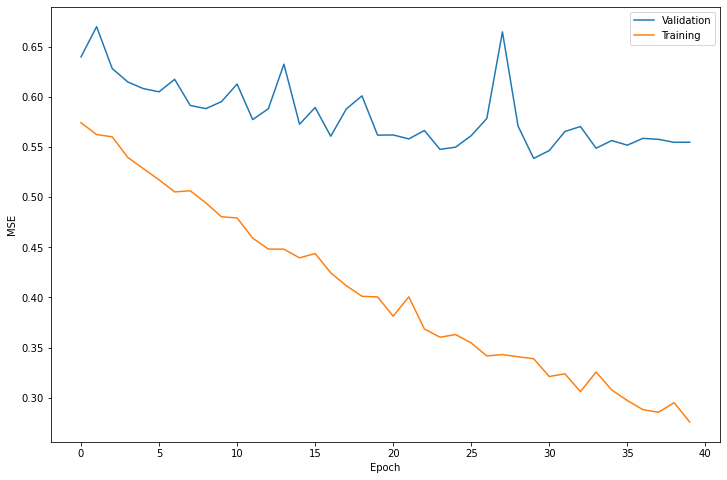

In [8]:
# train the model, and save the progress to hist (hist will be a dictionary)
n_epochs = 40
hist_relu_adamax_40 = CNN_2d_relu_adamax.fit(x = X_train, y = Y_train, epochs=n_epochs, validation_data=(X_valid,Y_valid))

# plot how the mse on the training and validation datasets evolved during training
plt.figure(figsize=(12,8))
plt.plot(hist_relu_adamax_40.history['val_loss'],label='Validation')
plt.plot(hist_relu_adamax_40.history['loss'],label='Training')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 96, 12)]      0         
                                                                 
 conv2d (Conv2D)             (None, 64, 96, 8)         872       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 48, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 48, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 24, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 24, 32)        4640  

2022-08-18 09:10:13.294009: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
85/85 [==============================] - 17s 192ms/step - loss: 1.3576 - val_loss: 1.2588
Epoch 2/20
85/85 [==============================] - 16s 185ms/step - loss: 1.0939 - val_loss: 1.0693
Epoch 3/20
85/85 [==============================] - 16s 192ms/step - loss: 0.8610 - val_loss: 0.7814
Epoch 4/20
85/85 [==============================] - 16s 186ms/step - loss: 0.7231 - val_loss: 0.7681
Epoch 5/20
85/85 [==============================] - 16s 186ms/step - loss: 0.5923 - val_loss: 0.7041
Epoch 6/20
85/85 [==============================] - 16s 186ms/step - loss: 0.5508 - val_loss: 0.7032
Epoch 7/20
85/85 [==============================] - 16s 192ms/step - loss: 0.4289 - val_loss: 0.6599
Epoch 8/20
85/85 [==============================] - 16s 186ms/step - loss: 0.4064 - val_loss: 0.7185
Epoch 9/20
85/85 [==============================] - 16s 185ms/step - loss: 0.3680 - val_loss: 0.6759
Epoch 10/20
85/85 [==============================] - 16s 185ms/step - loss: 0.3037 - val_lo

Text(0, 0.5, 'MSE')

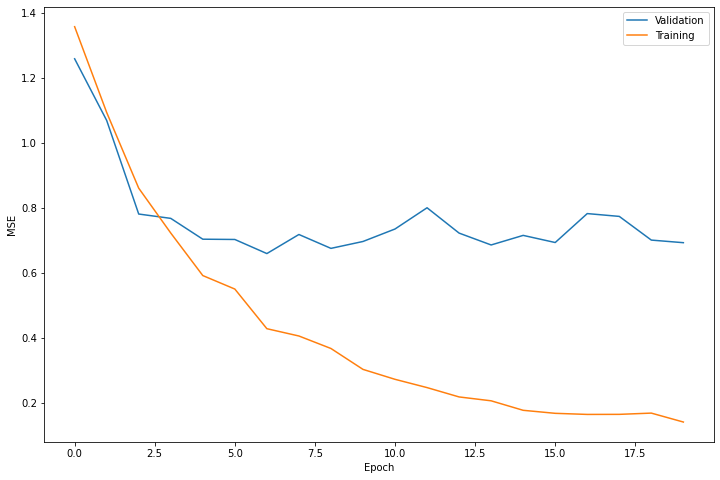

In [6]:
# selu, adam
CNN_2d_selu_adam = create_2d_cnn_model(input_shape=(64,96,12), output_shape=12, activation='selu',optimizer_name='adam')
# take a look at how the image tensor changes shape as it passes through the CNN:
CNN_2d_selu_adam.summary()

# train the model, and save the progress to hist (hist will be a dictionary)
n_epochs = 20
hist_selu_adam = CNN_2d_selu_adam.fit(x = X_train, y = Y_train, epochs=n_epochs, validation_data=(X_valid,Y_valid))

# plot how the mse on the training and validation datasets evolved during training
plt.figure(figsize=(12,8))
plt.plot(hist_selu_adam.history['val_loss'],label='Validation')
plt.plot(hist_selu_adam.history['loss'],label='Training')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 96, 12)]      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 96, 8)         872       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 48, 8)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 48, 16)        1168      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 24, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 24, 32)        4640

Text(0, 0.5, 'MSE')

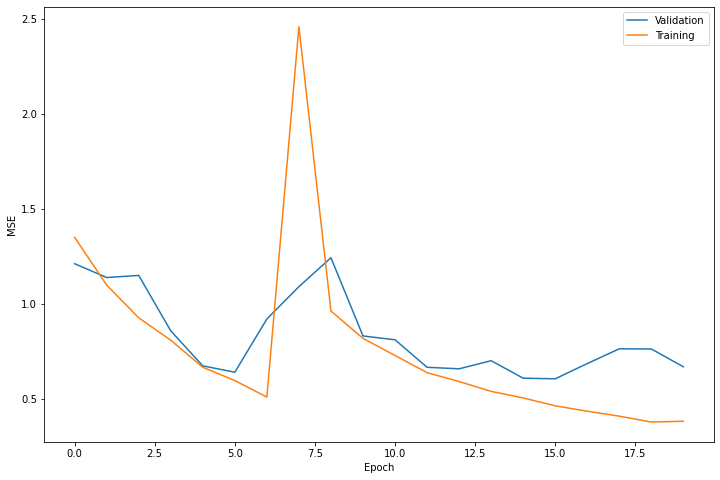

In [7]:
# selu, nadam
CNN_2d_selu_nadam = create_2d_cnn_model(input_shape=(64,96,12), output_shape=12, activation='selu',optimizer_name='nadam')
# take a look at how the image tensor changes shape as it passes through the CNN:
CNN_2d_selu_nadam.summary()

# train the model, and save the progress to hist (hist will be a dictionary)
n_epochs = 20
hist_selu_nadam = CNN_2d_selu_nadam.fit(x = X_train, y = Y_train, epochs=n_epochs, validation_data=(X_valid,Y_valid))

# plot how the mse on the training and validation datasets evolved during training
plt.figure(figsize=(12,8))
plt.plot(hist_selu_nadam.history['val_loss'],label='Validation')
plt.plot(hist_selu_nadam.history['loss'],label='Training')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE')

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 96, 12)]      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 96, 8)         872       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 48, 8)        0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 48, 16)        1168      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 24, 16)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 24, 32)        4640

Text(0, 0.5, 'MSE')

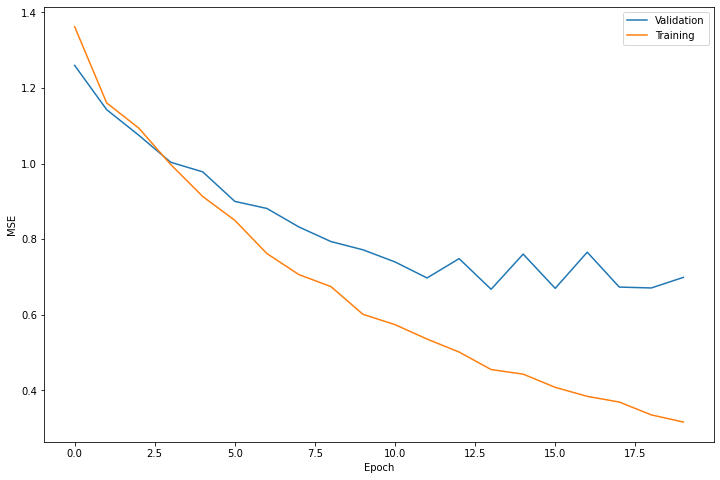

In [8]:
# selu, adamax
CNN_2d_selu_adamax = create_2d_cnn_model(input_shape=(64,96,12), output_shape=12, activation='selu',optimizer_name='adamax')
# take a look at how the image tensor changes shape as it passes through the CNN:
CNN_2d_selu_adamax.summary()

# train the model, and save the progress to hist (hist will be a dictionary)
n_epochs = 20
hist_selu_adamax = CNN_2d_selu_adamax.fit(x = X_train, y = Y_train, epochs=n_epochs, validation_data=(X_valid,Y_valid))

# plot how the mse on the training and validation datasets evolved during training
plt.figure(figsize=(12,8))
plt.plot(hist_selu_adamax.history['val_loss'],label='Validation')
plt.plot(hist_selu_adamax.history['loss'],label='Training')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE')

## 3D CNN Models (Activation = relu vs selu, Optimizer = adam, nadam, adamax)

In [5]:
# define a simple 3D CNN model
def create_3d_cnn_model(input_shape, output_shape, activation, optimizer_name):

    x = keras.layers.Input(shape=input_shape)
    
    y = keras.layers.Conv3D(4, (3,3,3), activation=activation, padding='same')(x) # add a convolutional layer with a ReLU activation
    y = keras.layers.MaxPooling3D(pool_size=(2,2,1))(y)     # add a max pooling layer

    y = keras.layers.Conv3D(8, (3,3,3), activation=activation, padding='same')(y)
    y = keras.layers.MaxPooling3D(pool_size=(2,2,1))(y)

    y = keras.layers.Conv3D(16, (3,3,3), activation=activation, padding='same')(y)
    y = keras.layers.MaxPooling3D(pool_size=(2,2,1))(y)

    y = keras.layers.Conv3D(32, (3,3,3), activation=activation, padding='same')(y)
    y = keras.layers.MaxPooling3D(pool_size=(2,2,1))(y)

    y = keras.layers.Conv3D(64, (3,3,3), activation=activation, padding='same')(y)
    
    y = keras.layers.GlobalAveragePooling3D()(y)

    y = keras.layers.Dropout(0.5)(y)

    y = keras.layers.Dense(output_shape)(y)     # add final output layer with a softmax activation
    
    model = keras.models.Model(inputs=x, outputs=y)
    
    model.compile(optimizer=optimizer_name, loss='mse')
    
    return model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 96, 12, 1)]   0         
                                                                 
 conv3d (Conv3D)             (None, 64, 96, 12, 4)     112       
                                                                 
 max_pooling3d (MaxPooling3D  (None, 32, 48, 12, 4)    0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 32, 48, 12, 8)     872       
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 16, 24, 12, 8)    0         
 3D)                                                             
                                                                 
 conv3d_2 (Conv3D)           (None, 16, 24, 12, 16)    3472  

2022-08-18 14:42:38.050382: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
85/85 [==============================] - 410s 5s/step - loss: 1.4982 - val_loss: 1.5654
Epoch 2/20
85/85 [==============================] - 409s 5s/step - loss: 1.4062 - val_loss: 1.4326
Epoch 3/20
85/85 [==============================] - 415s 5s/step - loss: 1.2335 - val_loss: 1.1628
Epoch 4/20
85/85 [==============================] - 421s 5s/step - loss: 1.0867 - val_loss: 0.9851
Epoch 5/20
85/85 [==============================] - 427s 5s/step - loss: 0.9220 - val_loss: 0.9262
Epoch 6/20
85/85 [==============================] - 440s 5s/step - loss: 0.8889 - val_loss: 0.8380
Epoch 7/20
85/85 [==============================] - 440s 5s/step - loss: 0.7801 - val_loss: 0.8025
Epoch 8/20
85/85 [==============================] - 419s 5s/step - loss: 0.7042 - val_loss: 0.7721
Epoch 9/20
85/85 [==============================] - 423s 5s/step - loss: 0.7010 - val_loss: 0.7467
Epoch 10/20
85/85 [==============================] - 420s 5s/step - loss: 0.6723 - val_loss: 0.7032
Epoch 11/

Text(0, 0.5, 'MSE')

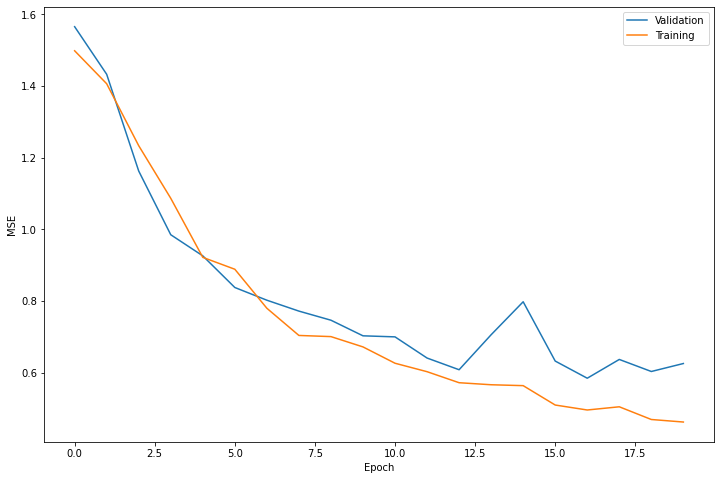

In [6]:
# relu, adam
CNN_3d_relu_adam = create_3d_cnn_model(input_shape=(64,96,12,1), output_shape=12, activation='relu',optimizer_name='adam')
# take a look at how the image tensor changes shape as it passes through the CNN:
CNN_3d_relu_adam.summary()

# train the model, and save the progress to hist (hist will be a dictionary)
n_epochs = 20
hist_3D_relu_adam = CNN_3d_relu_adam.fit(x = X_train, y = Y_train, epochs=n_epochs, validation_data=(X_valid,Y_valid))

# plot how the accuracy on the training and validation datasets evolved during training
plt.figure(figsize=(12,8))
plt.plot(hist_3D_relu_adam.history['val_loss'],label='Validation')
plt.plot(hist_3D_relu_adam.history['loss'],label='Training')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE')

In [ ]:
# relu, nadam
CNN_3d_relu_nadam = create_3d_cnn_model(input_shape=(64,96,12,1), output_shape=12, activation='relu',optimizer_name='nadam')
# take a look at how the image tensor changes shape as it passes through the CNN:
CNN_3d_relu_nadam.summary()

# train the model, and save the progress to hist (hist will be a dictionary)
n_epochs = 20
hist_3D_relu_nadam = CNN_3d_relu_nadam.fit(x = X_train, y = Y_train, epochs=n_epochs, validation_data=(X_valid,Y_valid))

# plot how the accuracy on the training and validation datasets evolved during training
plt.figure(figsize=(12,8))
plt.plot(hist_3D_relu_nadam.history['val_loss'],label='Validation')
plt.plot(hist_3D_relu_nadam.history['loss'],label='Training')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 96, 12, 1)]   0         
                                                                 
 conv3d_5 (Conv3D)           (None, 64, 96, 12, 4)     112       
                                                                 
 max_pooling3d_4 (MaxPooling  (None, 32, 48, 12, 4)    0         
 3D)                                                             
                                                                 
 conv3d_6 (Conv3D)           (None, 32, 48, 12, 8)     872       
                                                                 
 max_pooling3d_5 (MaxPooling  (None, 16, 24, 12, 8)    0         
 3D)                                                             
                                                                 
 conv3d_7 (Conv3D)           (None, 16, 24, 12, 16)    3472

In [ ]:
# relu, adamax
CNN_3d_relu_adamax = create_3d_cnn_model(input_shape=(64,96,12,1), output_shape=12, activation='relu',optimizer_name='adamax')
# take a look at how the image tensor changes shape as it passes through the CNN:
CNN_3d_relu_adamax.summary()

# train the model, and save the progress to hist (hist will be a dictionary)
n_epochs = 20
hist_3D_relu_adamax = CNN_3d_relu_adamax.fit(x = X_train, y = Y_train, epochs=n_epochs, validation_data=(X_valid,Y_valid))

# plot how the accuracy on the training and validation datasets evolved during training
plt.figure(figsize=(12,8))
plt.plot(hist_3D_relu_adamax.history['val_loss'],label='Validation')
plt.plot(hist_3D_relu_adamax.history['loss'],label='Training')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE')

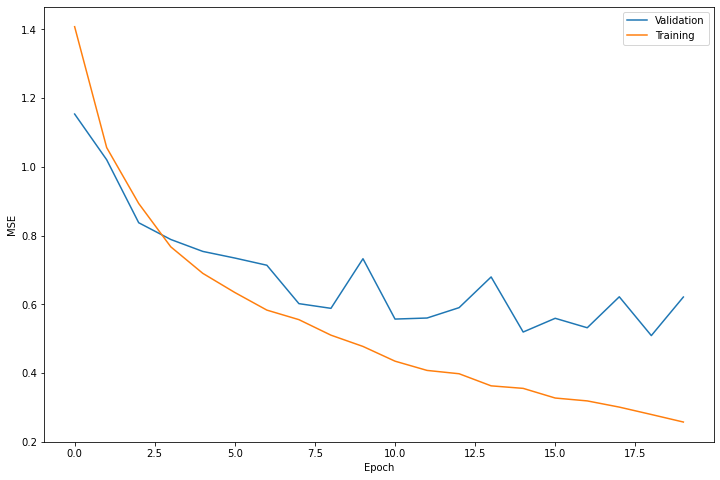

In [29]:
# selu, adam
CNN_3d_relu_adamax = create_3d_cnn_model(input_shape=(64,96,12,1), output_shape=12, activation='relu',optimizer_name='adamax')
# take a look at how the image tensor changes shape as it passes through the CNN:
CNN_3d_relu_adamax.summary()

# train the model, and save the progress to hist (hist will be a dictionary)
n_epochs = 20
hist_3D_relu_adamax = CNN_3d_relu_adamax.fit(x = X_train, y = Y_train, epochs=n_epochs, validation_data=(X_valid,Y_valid))

# plot how the accuracy on the training and validation datasets evolved during training
plt.figure(figsize=(12,8))
plt.plot(hist_3D_relu_adamax.history['val_loss'],label='Validation')
plt.plot(hist_3D_relu_adamax.history['loss'],label='Training')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE')